# <center><u>**ME 228 Project**</u></center>
### <center>Shikhar Kunal Verma - 22b2201</center>
### <center>Pratyush Jagtap - 22b2202</center>
### <center>Guided by - _Prof. Shyamprasad Karagadde_</center>
---
---


# **STELLAR CLASSIFICATION**

### In astronomy, stellar classification is the classification of stars based on their spectral characteristics. The classification scheme of galaxies, quasars, and stars is one of the most fundamental in astronomy. The early cataloguing of stars and their distribution in the sky has led to the understanding that they make up our own galaxy and, following the distinction that Andromeda was a separate galaxy to our own, numerous galaxies began to be surveyed as more powerful telescopes were built. This project aims to classidy stars, galaxies, and quasars based on their spectral characteristics.
---
## About Dataset Used

### The data used for this project was taken from [kaggle.com](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17). 
### The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

---
***

## Plan of Action
- Importing Libraries
- Loading the Dataset
- Exploring the Data
- Data preprocessing and feature engineering
- Data Visualisation using Plots
- Data Splitting in Test and Train
- Model fitting and Choosing Best Model and Parameters
- Final Evaluation on Test

---
# **Importing Libraries**


In [36]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

---

# **Dataset Loading as Pandas Dataframe**

In [37]:
#dataset loading
df = pd.read_csv("./star_classification.csv")
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


---

# **Exploratory Data Analysis**

### Checking the number of unique value in all the features to identify which all are categorical data

In [38]:
# checking number of unique values in each column
for i in df.columns:
    print(df[f'{i}'].unique().shape)

(78053,)
(99999,)
(99999,)
(93748,)
(92651,)
(91901,)
(92019,)
(92007,)
(430,)
(1,)
(6,)
(856,)
(100000,)
(3,)
(99295,)
(6284,)
(2180,)
(1000,)


In [39]:
# checking for column value ranges
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [40]:
#column names
df.columns


Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

### Checking the number of null values in each column

There are no NULL Values in any columns

In [41]:
#checking for null values
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

### Checking Datatypes
All datatypes are either float64 or int64 except the class column, which is also our target column in this project. <br>
<br>
The 'class' column has to be converted into numerical datatype for the fitting it to any model.

In [42]:
#checking for data types
df.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

### Checking all the Unique values of the 'class' column

In [43]:
#classes
df['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

---
# **Data Preprocessing**

['GALAXY', 'QSO', 'STAR'] are the 3 classes in this dataset. They have to be converted into numerical data LabelEncoder

In [44]:
# label encoding the class column
from sklearn import preprocessing 
  
label_encoder = preprocessing.LabelEncoder() 
 
df['class']= label_encoder.fit_transform(df['class']) 
  
df['class'].unique()

array([0, 1, 2])

### Calculating Correlation Matrix and plotting it

Correlation matrix can be used to remove columns which are highly correlated. <br>

Removing any one of the two higly correlated data won't affect the model's performance, but will significantly reduce the computation cost.

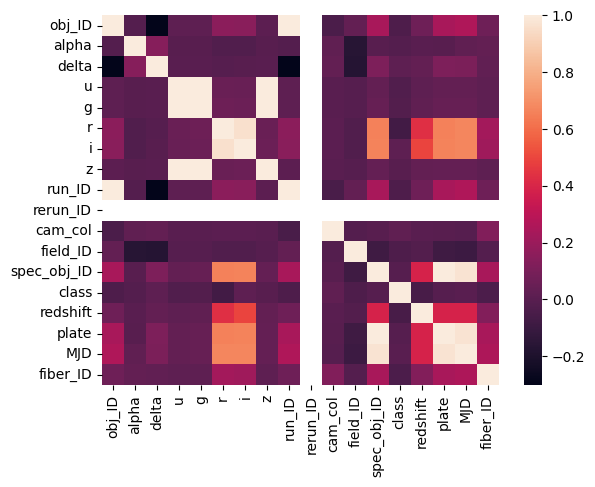

In [45]:
import seaborn as sns
corr_matrix = df.corr() #calculating the correlation matrix
data_plot = sns.heatmap(corr_matrix) #heatmap
plt.show()


In [46]:
corr_numpy = corr_matrix.to_numpy() #converting corr matrix to numpy for easy work ahead
high = 0
moderate = 0
low = 0
very_high = 0
unusable = []
for i in range(len(corr_numpy)):
  for j in range(len(corr_numpy[0])):
    if abs(corr_numpy[i][j])>0.9 and i!=j:
      very_high = very_high +1
      unusable.append([i,j])
    elif abs(corr_numpy[i][j])>0.5: high = high +1
    elif abs(corr_numpy[i][j])>0.2: moderate = moderate +1
    else: low = low +1
print(very_high, high, moderate, low)
print(unusable)

# drop 4,6,7,8,15,16,

16 29 36 243
[[0, 8], [3, 4], [3, 7], [4, 3], [4, 7], [5, 6], [6, 5], [7, 3], [7, 4], [8, 0], [12, 15], [12, 16], [15, 12], [15, 16], [16, 12], [16, 15]]


One of the two columns with correlation above threshold(0.9) can be removed. Above are the columns with very high(>0.9) correlation. 

Manually analysing from the output of very high correlation column pairs, we can deduce that the following columns can be removed.
- 4, 6, 7, 8, 15, 16 



### Now we drop columns with high correlation 

In [47]:
#dropping the columns with high correlation
df.drop(df.columns[[4,6,7,8,15,16]],axis = 1, inplace=True)

---
# **Data Visualisation**

## Below are the density subplots of each column. From these plots, the distribution can be analysed

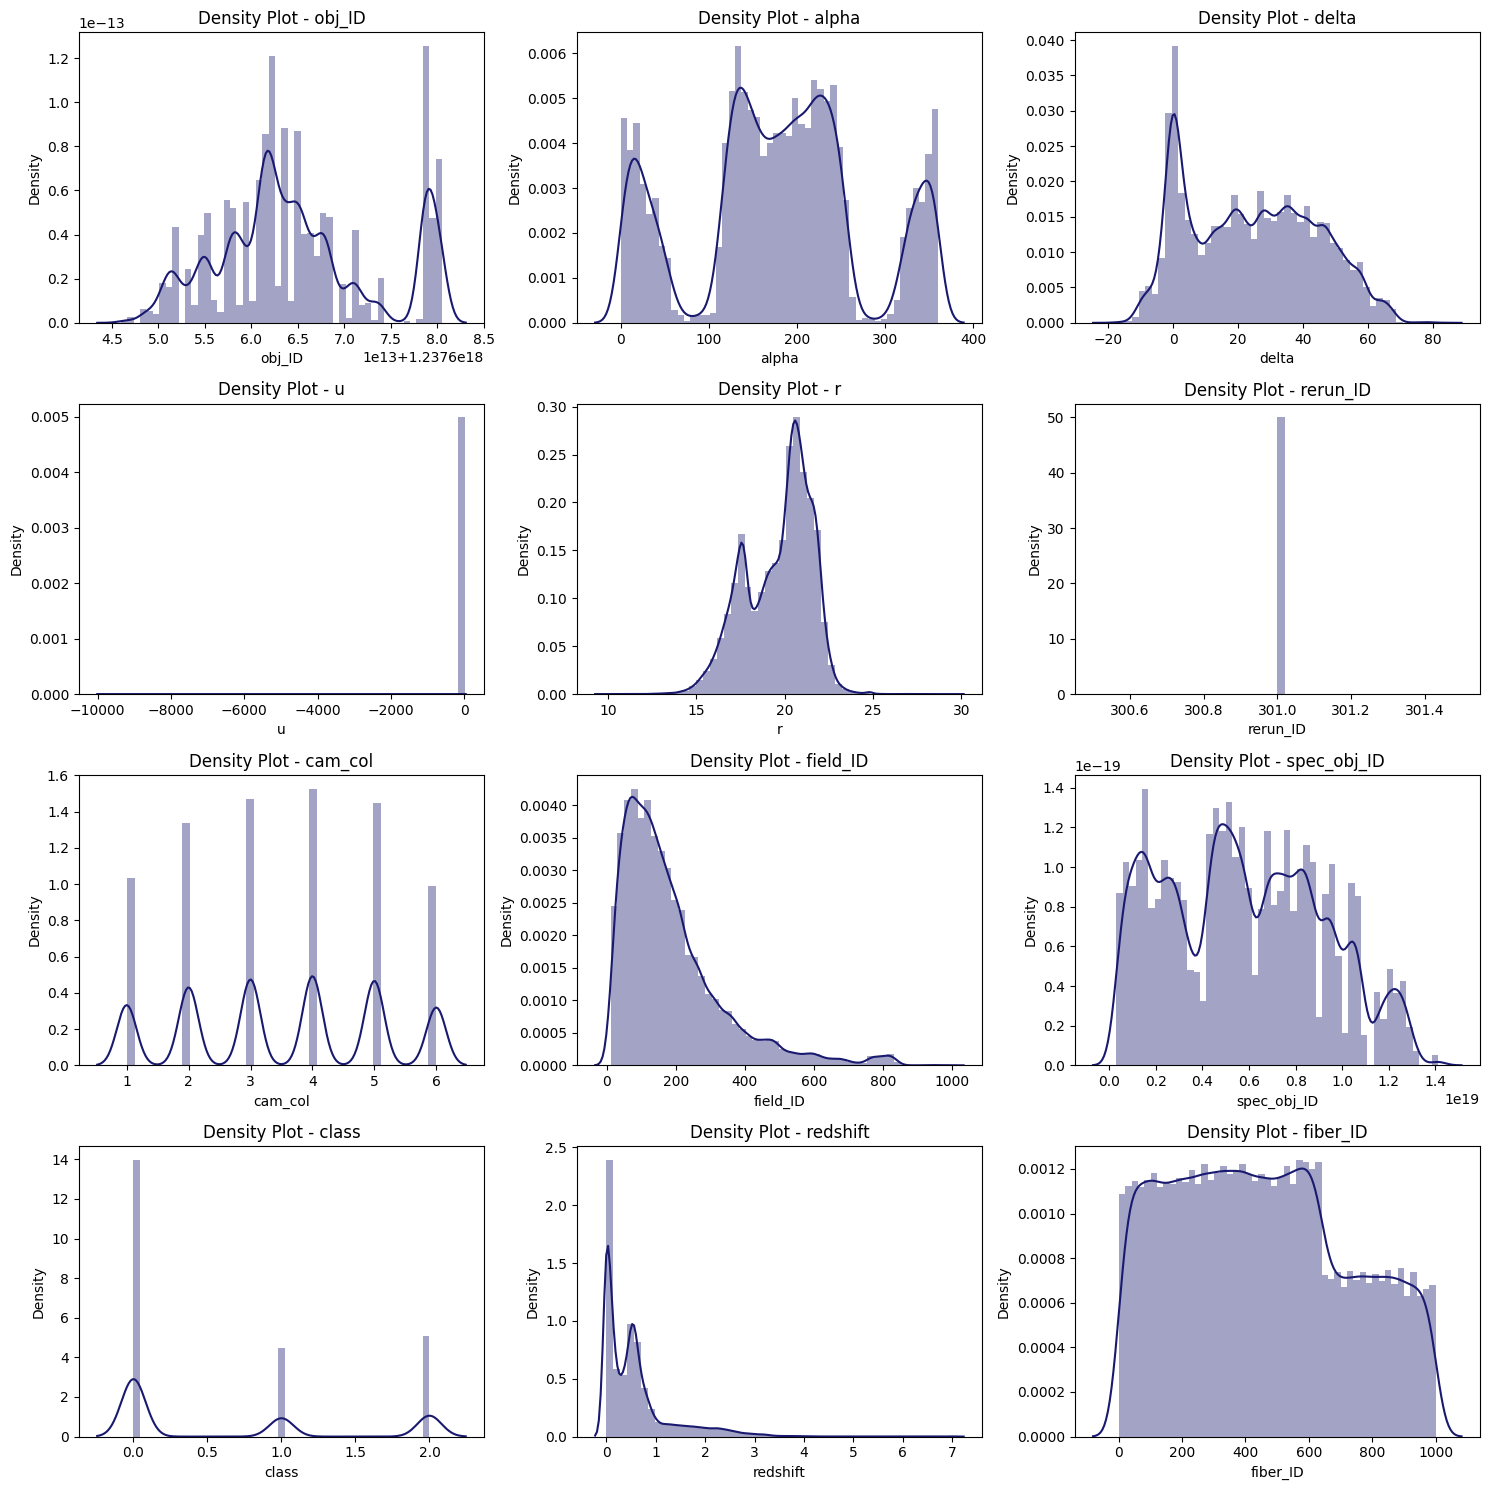

In [48]:
#plots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.distplot(df[column], kde=True, color="midnightblue", ax=axes[i])
    axes[i].set_title(f"Density Plot - {column}")

for j in range(len(df.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [49]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'r', 'rerun_ID', 'cam_col', 'field_ID',
       'spec_obj_ID', 'class', 'redshift', 'fiber_ID'],
      dtype='object')

In [50]:
X = df[['obj_ID', 'alpha', 'delta', 'u', 'r', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift', 'fiber_ID']]
y = df['class']

### The Values in different columns have different ranges.
### Data with high numerical value are more sensitive to weights.
### To avoid this, we will now scale our dataset.

In [51]:
#scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
df = pd.DataFrame(X, columns=['obj_ID', 'alpha', 'delta', 'u', 'r', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift', 'fiber_ID'])
df['class'] = y 
df.head()

,obj_ID,alpha,delta,u,r,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,fiber_ID,class
0,0.434203,0.376905,0.503802,0.999113,0.535344,0.0,0.2,0.069530,0.451585,0.091831,0.170170,0
1,0.547496,0.402286,0.491812,0.999202,0.646203,0.0,0.8,0.110429,0.828833,0.112389,0.426426,0
2,0.434203,0.394960,0.534139,0.999251,0.546218,0.0,0.2,0.111452,0.350946,0.093170,0.298298,0
3,0.506985,0.940947,0.180600,0.998939,0.596946,0.0,0.4,0.207566,0.723313,0.134210,0.774775,0
4,0.992503,0.959118,0.392679,0.998670,0.337999,0.0,0.4,0.128834,0.476759,0.017959,0.841842,0


### Plotting Box PLots

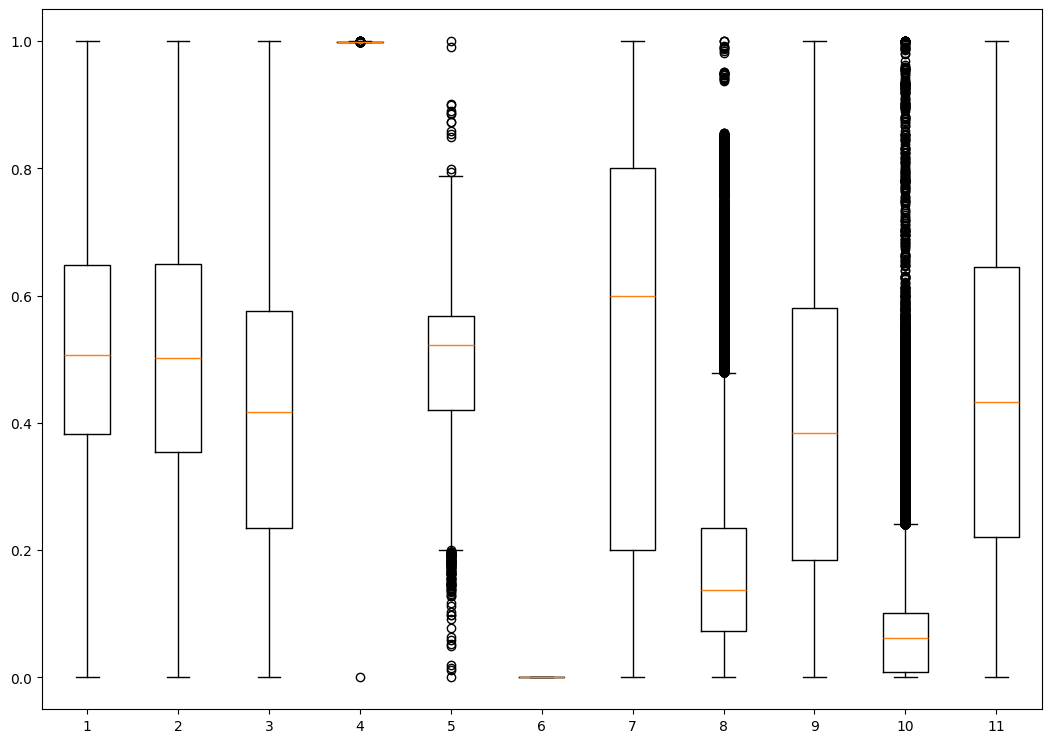

In [52]:
fig = plt.figure(figsize =(10, 7))
 
ax = fig.add_axes([0, 0, 1, 1])
 
bp = ax.boxplot(X)
 
plt.show()

---

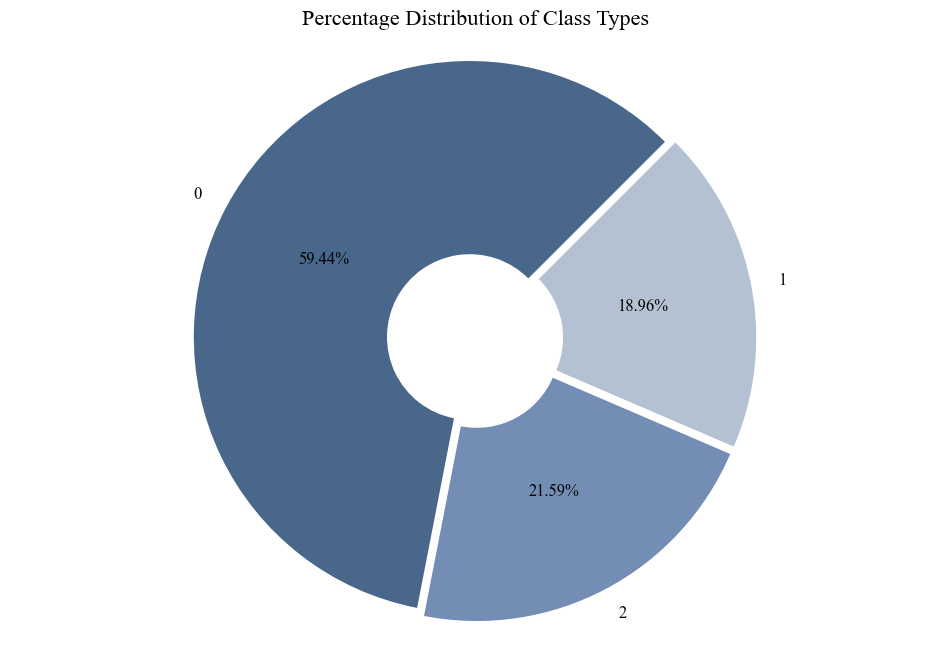

In [53]:
class_counts = df['class'].value_counts()
colors = ['#48678b', '#748db4', '#b3c1d2']  
explode = (0.015, 0.025, 0.025)  

plt.figure(figsize = (12, 8))
plt.pie(class_counts, autopct = '%1.2f%%',
        startangle = 45, labels = class_counts.index, colors = colors, explode = explode, textprops = {'fontname': 'Times New Roman', 'fontsize': 12},
       wedgeprops=dict(width=0.7))
plt.title('Percentage Distribution of Class Types', fontsize = 16, fontname = 'Times New Roman')
plt.axis('equal')
plt.show()

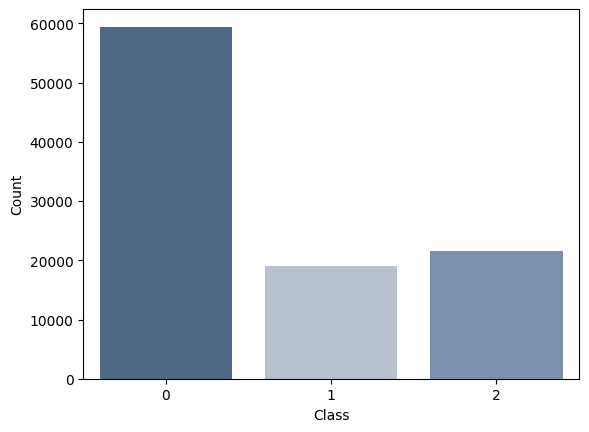

In [54]:
colors = ['#48678b', '#b3c1d2', '#748db4'] 
sns.countplot(data = df, x = 'class', palette = colors)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### As it is visible in the graph, our dataset is imbalanced as well as there are too many data points. 
### Large dataset will increase the computation cost by a lot.


### To avoid all that, we will undersample the datasets to 5000 datapoints in each class.

In [55]:
from collections import Counter

class_counts = Counter(df['class'])

min_class_occurrence = min(class_counts.values())
min_class = [cls for cls, count in class_counts.items() if count == min_class_occurrence][0]

df = pd.concat([df[df['class'] == cls].sample(5000) for cls in class_counts.keys()])

df.reset_index(drop=True, inplace=True)

print(df.shape)


(15000, 12)


In [56]:
#final class value counts
df['class'].value_counts()

class
0    5000
1    5000
2    5000
Name: count, dtype: int64

---
# **Data Splitting**

In [57]:
X = df[['obj_ID', 'alpha', 'delta', 'u', 'r', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift', 'fiber_ID']]
y = df['class']

In [59]:
#splitting the data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33,shuffle=True, random_state=42)

In [60]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((10050, 11), (4950, 11), (10050,), (4950,))

To find the best model, we are fitting 6 different types of model. Also their hyperparameters are tuned using gridsearch. 

The following are the models used:

- Support Vector Classifier

- Multi-Layer Perceptron Classifier

- Random Forest Classifier

- AdaBoost Classifier

- Gaussian Naive Bayes

- Logistic Regression

---
# **Model Selection**

**For every Model, confusion matrix and classification report is printed, which contains all the useful metrices like precision recall f1-score.**

## Support Vector Classification

Hyperparameter: C <br>

Values taken: 0.1, 1, 10

In [63]:
param_grid_1 = {'C': [0.1, 1, 10],
              'gamma': [0.01]}
grid_1 = GridSearchCV(SVC(), param_grid_1, refit = True, verbose = 3, cv=2)
grid_1.fit(x_train, y_train)

print(grid_1.best_params_)

print(grid_1.best_estimator_)


grid_predictions_1 = grid_1.predict(x_train)


print(classification_report(y_train, grid_predictions_1))
accuracy_1 = accuracy_score(y_train, grid_predictions_1)
print("Accuracy:", accuracy_1)


Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV 1/2] END .................C=0.1, gamma=0.01;, score=0.527 total time=   1.5s
[CV 2/2] END .................C=0.1, gamma=0.01;, score=0.519 total time=   1.5s
[CV 1/2] END ...................C=1, gamma=0.01;, score=0.602 total time=   1.3s
[CV 2/2] END ...................C=1, gamma=0.01;, score=0.613 total time=   1.3s
[CV 1/2] END ..................C=10, gamma=0.01;, score=0.795 total time=   1.1s
[CV 2/2] END ..................C=10, gamma=0.01;, score=0.788 total time=   1.2s
{'C': 10, 'gamma': 0.01}
SVC(C=10, gamma=0.01)
              precision    recall  f1-score   support

           0       0.77      0.62      0.69      3333
           1       0.98      0.80      0.88      3362
           2       0.72      1.00      0.84      3355

    accuracy                           0.81     10050
   macro avg       0.83      0.81      0.80     10050
weighted avg       0.83      0.81      0.80     10050

Accuracy: 0.808457711442786

In [64]:
classes = ['GALAXY', 'QSO', 'STAR']

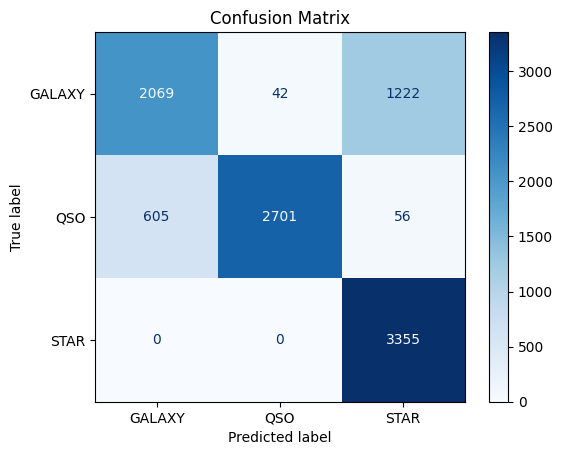

In [65]:
cm = confusion_matrix(y_train, grid_predictions_1)

# Plot the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## Multilayer Perceptron Classifier

Hyperparameters: Hidden Layer Sizes and Learning Rate Initial

Hidden Layer Size: 32, 64

Learning Rate Initial: 0.1, 0.01, 0.001

In [66]:
#MLP
classifier = MLPClassifier(max_iter = 500)

param_grid_2 = {'hidden_layer_sizes': [32, 64],
              'learning_rate_init': [0.1, 0.01, 0.001]}
grid_2 = GridSearchCV(classifier, param_grid_2, refit = True, verbose = 3, error_score = 'raise', cv= 2)
grid_2.fit(x_train, y_train)

print(grid_2.best_params_)

print(grid_2.best_estimator_)

grid_predictions_2 = grid_2.predict(x_train)

print(classification_report(y_train, grid_predictions_2))
accuracy_2 = accuracy_score(y_train, grid_predictions_2)
print("Accuracy:", accuracy_2)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[CV 1/2] END hidden_layer_sizes=32, learning_rate_init=0.1;, score=0.932 total time=   0.2s
[CV 2/2] END hidden_layer_sizes=32, learning_rate_init=0.1;, score=0.931 total time=   0.2s
[CV 1/2] END hidden_layer_sizes=32, learning_rate_init=0.01;, score=0.938 total time=   0.5s
[CV 2/2] END hidden_layer_sizes=32, learning_rate_init=0.01;, score=0.937 total time=   0.5s
[CV 1/2] END hidden_layer_sizes=32, learning_rate_init=0.001;, score=0.938 total time=   1.7s
[CV 2/2] END hidden_layer_sizes=32, learning_rate_init=0.001;, score=0.938 total time=   1.7s
[CV 1/2] END hidden_layer_sizes=64, learning_rate_init=0.1;, score=0.933 total time=   0.4s
[CV 2/2] END hidden_layer_sizes=64, learning_rate_init=0.1;, score=0.936 total time=   0.3s
[CV 1/2] END hidden_layer_sizes=64, learning_rate_init=0.01;, score=0.934 total time=   0.6s
[CV 2/2] END hidden_layer_sizes=64, learning_rate_init=0.01;, score=0.938 total time=   0.5s
[CV 1/2] END hidden_layer_sizes=64, learning_rate_init=0.001;, score=0.9

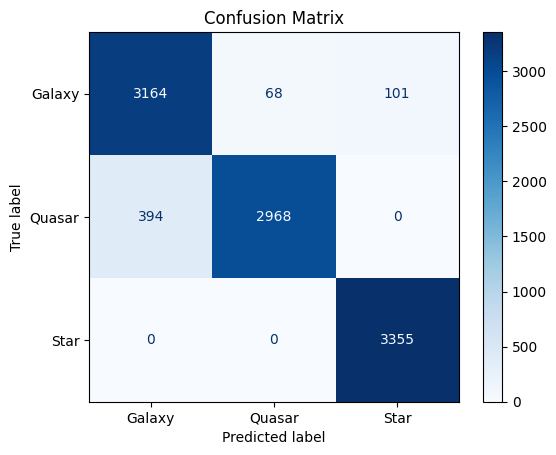

In [67]:
cm = confusion_matrix(y_train, grid_predictions_2)

# Plot the confusion matrix using ConfusionMatrixDisplay
classes = ['Galaxy', 'Quasar', 'Star']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## Random Forest Classifier

Hyperparameters: Max Depth and Max Leaf Nodes
 
Max Depth: 5, 7, 9

Max Leaf Nodes: 50, 100, 150

In [68]:
#Random Forest
classifier = RandomForestClassifier()

param_grid_5 = {'max_depth': [5, 7, 9],
              'max_leaf_nodes': [50, 100, 150]}
grid_5 = GridSearchCV(classifier, param_grid_5, refit = True, verbose = 3, error_score = 'raise', cv=2)
grid_5.fit(x_train, y_train)

print(grid_5.best_params_)

print(grid_5.best_estimator_)

grid_predictions_5 = grid_5.predict(x_train)

print(classification_report(y_train, grid_predictions_5))
accuracy_5 = accuracy_score(y_train, grid_predictions_5)
print("Accuracy:", accuracy_5)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV 1/2] END ....max_depth=5, max_leaf_nodes=50;, score=0.956 total time=   0.4s
[CV 2/2] END ....max_depth=5, max_leaf_nodes=50;, score=0.957 total time=   0.4s
[CV 1/2] END ...max_depth=5, max_leaf_nodes=100;, score=0.957 total time=   0.4s
[CV 2/2] END ...max_depth=5, max_leaf_nodes=100;, score=0.952 total time=   0.5s
[CV 1/2] END ...max_depth=5, max_leaf_nodes=150;, score=0.958 total time=   0.5s
[CV 2/2] END ...max_depth=5, max_leaf_nodes=150;, score=0.955 total time=   0.4s
[CV 1/2] END ....max_depth=7, max_leaf_nodes=50;, score=0.963 total time=   0.5s
[CV 2/2] END ....max_depth=7, max_leaf_nodes=50;, score=0.963 total time=   0.5s
[CV 1/2] END ...max_depth=7, max_leaf_nodes=100;, score=0.963 total time=   0.5s
[CV 2/2] END ...max_depth=7, max_leaf_nodes=100;, score=0.960 total time=   0.5s
[CV 1/2] END ...max_depth=7, max_leaf_nodes=150;, score=0.963 total time=   0.5s
[CV 2/2] END ...max_depth=7, max_leaf_nodes=150;,

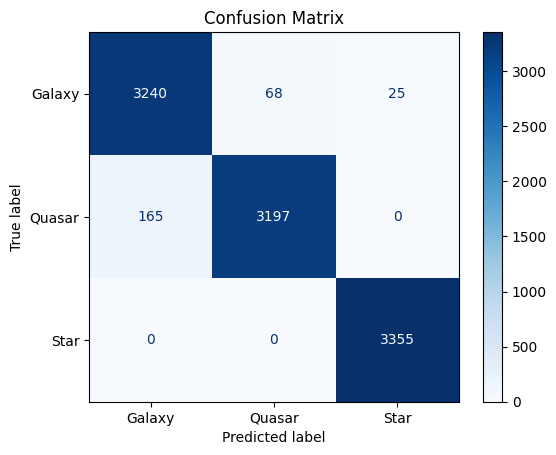

In [69]:
cm = confusion_matrix(y_train, grid_predictions_5)

# Plot the confusion matrix using ConfusionMatrixDisplay
classes = ['Galaxy', 'Quasar', 'Star']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## AdaBoostClassifier

Hyperparameters: N estimators and Learning Rate

N_estimators: 50, 100, 150

Learning Rate: 0.1, 0.01

In [70]:
#AdaBoost
classifier = AdaBoostClassifier()

param_grid_3 = { 'n_estimators': [50, 100, 150],
              'learning_rate': [0.1, 0.01]}
grid_3 = GridSearchCV(classifier, param_grid_3, refit = True, verbose = 3, error_score = 'raise', cv=2)
grid_3.fit(x_train, y_train)

print(grid_3.best_params_)

print(grid_3.best_estimator_)

grid_predictions_3 = grid_3.predict(x_train)

print(classification_report(y_train, grid_predictions_3))
accuracy_3 = accuracy_score(y_train, grid_predictions_3)
print("Accuracy:", accuracy_3)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[CV 1/2] END learning_rate=0.1, n_estimators=50;, score=0.663 total time=   0.3s
[CV 2/2] END learning_rate=0.1, n_estimators=50;, score=0.661 total time=   0.3s
[CV 1/2] END learning_rate=0.1, n_estimators=100;, score=0.663 total time=   0.6s
[CV 2/2] END learning_rate=0.1, n_estimators=100;, score=0.661 total time=   0.5s
[CV 1/2] END learning_rate=0.1, n_estimators=150;, score=0.663 total time=   0.8s
[CV 2/2] END learning_rate=0.1, n_estimators=150;, score=0.661 total time=   0.8s
[CV 1/2] END learning_rate=0.01, n_estimators=50;, score=0.927 total time=   0.3s
[CV 2/2] END learning_rate=0.01, n_estimators=50;, score=0.927 total time=   0.3s
[CV 1/2] END learning_rate=0.01, n_estimators=100;, score=0.929 total time=   0.5s
[CV 2/2] END learning_rate=0.01, n_estimators=100;, score=0.927 total time=   0.5s
[CV 1/2] END learning_rate=0.01, n_estimators=150;, score=0.663 total time=   0.8s
[CV 2/2] END learning_rate=0.01, n_estimators=150;, score=0.917 total time=   0.8s
{'learning_rat

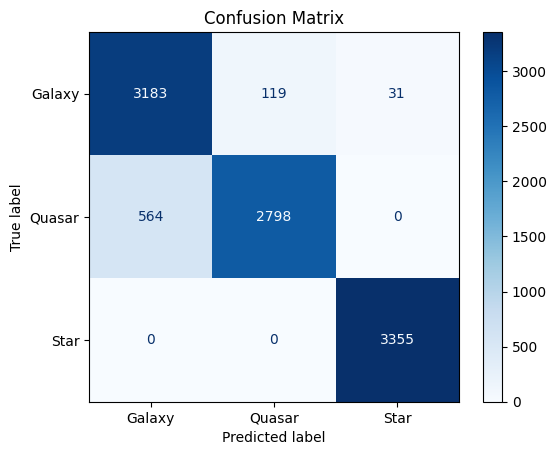

In [71]:
cm = confusion_matrix(y_train, grid_predictions_3)

# Plot the confusion matrix using ConfusionMatrixDisplay
classes = ['Galaxy', 'Quasar', 'Star']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## Gaussian Naive Bayes

Hyperparameter: Var Smoothing

Var_smoothing: 1e-9, 1e-10, 1e-11


In [80]:
#GaussianNB
classifier = GaussianNB()

param_grid_4 = {'var_smoothing': [1e-9, 1e-10, 1e-11]}
grid_4 = GridSearchCV(classifier, param_grid_4, refit = True, verbose = 3, error_score = 'raise', cv=2)
grid_4.fit(x_train, y_train)

print(grid_4.best_params_)

print(grid_4.best_estimator_)

grid_predictions_4 = grid_4.predict(x_train)

print(classification_report(y_train, grid_predictions_4))
accuracy_4 = accuracy_score(y_train, grid_predictions_4)
print("Accuracy:", accuracy_4)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV 1/2] END ...............var_smoothing=1e-09;, score=0.925 total time=   0.0s
[CV 2/2] END ...............var_smoothing=1e-09;, score=0.919 total time=   0.0s
[CV 1/2] END ...............var_smoothing=1e-10;, score=0.925 total time=   0.0s
[CV 2/2] END ...............var_smoothing=1e-10;, score=0.919 total time=   0.0s
[CV 1/2] END ...............var_smoothing=1e-11;, score=0.925 total time=   0.0s
[CV 2/2] END ...............var_smoothing=1e-11;, score=0.919 total time=   0.0s
{'var_smoothing': 1e-09}
GaussianNB()
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      3333
           1       0.90      0.88      0.89      3362
           2       0.99      0.99      0.99      3355

    accuracy                           0.92     10050
   macro avg       0.92      0.92      0.92     10050
weighted avg       0.92      0.92      0.92     10050

Accuracy: 0.922089552238806


In [73]:
# grid_predictions_4.shape
y_train.shape

(10050,)

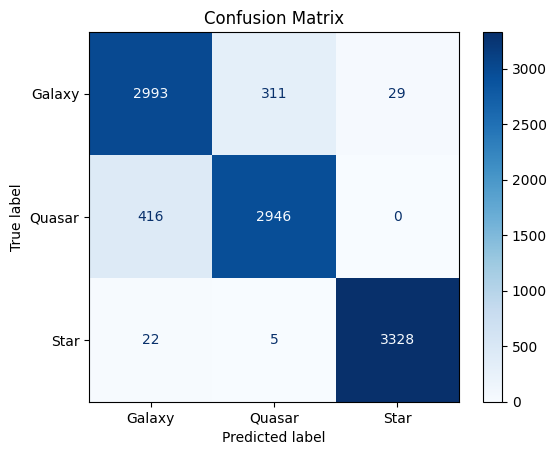

In [81]:
cm = confusion_matrix(y_train, grid_predictions_4)

# Plot the confusion matrix using ConfusionMatrixDisplay
classes = ['Galaxy', 'Quasar', 'Star']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## Logistic Regression 


In [82]:
#logistici regression
classifier = LogisticRegression()

classifier.fit(x_train, y_train)

predictions = classifier.predict(x_train)

print(classification_report(y_train, predictions))
accuracy_6 = accuracy_score(y_train, predictions)
print("Accuracy:", accuracy_6)


              precision    recall  f1-score   support

           0       0.84      0.75      0.79      3333
           1       0.95      0.85      0.90      3362
           2       0.82      1.00      0.90      3355

    accuracy                           0.87     10050
   macro avg       0.87      0.87      0.86     10050
weighted avg       0.87      0.87      0.86     10050

Accuracy: 0.865771144278607


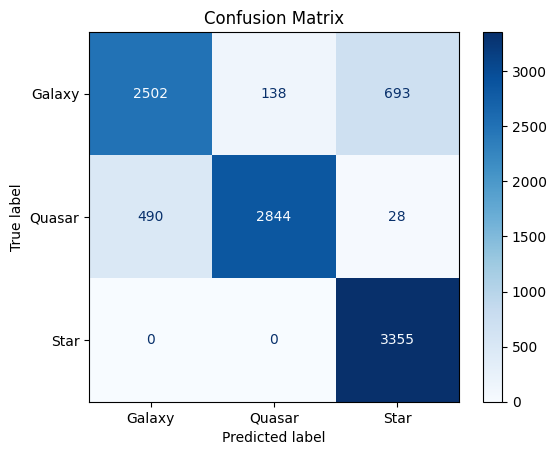

In [83]:
cm = confusion_matrix(y_train, predictions)

# Plot the confusion matrix using ConfusionMatrixDisplay
classes = ['Galaxy', 'Quasar', 'Star']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

---
# Choosing the Best Model

## After plotting the accuracies of all the models, it can be clearly seen that Random Forest performed the best.

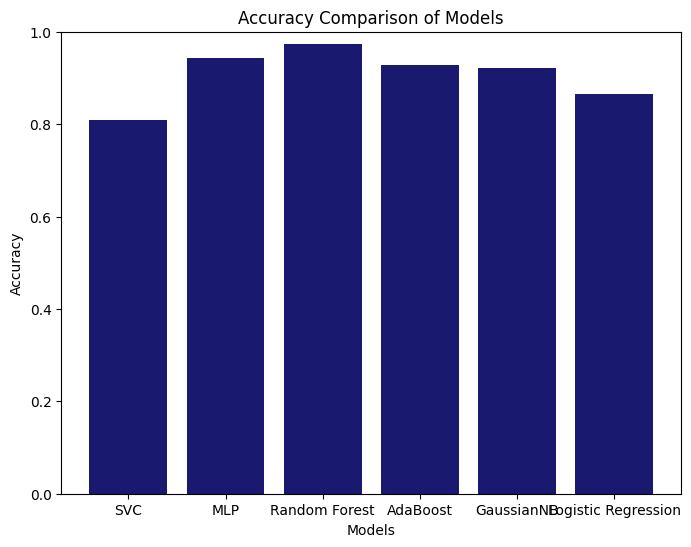

In [76]:
models = ['SVC', 'MLP', 'Random Forest', 'AdaBoost', 'GaussianNB', 'Logistic Regression']
accuracy = [accuracy_1, accuracy_2, accuracy_5, accuracy_3, accuracy_4, accuracy_6]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracy, color='midnightblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models')
plt.ylim(0, 1)  
plt.show()


---
# Final Testing on Test Dataset

In [77]:
grid_predictions_test = grid_5.predict(x_test)

print(classification_report(y_test, grid_predictions_test))
accuracy_test = accuracy_score(y_test, grid_predictions_test)
print("Accuracy:", accuracy_test)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1667
           1       0.97      0.93      0.95      1638
           2       0.99      1.00      1.00      1645

    accuracy                           0.96      4950
   macro avg       0.96      0.96      0.96      4950
weighted avg       0.96      0.96      0.96      4950

Accuracy: 0.9626262626262626


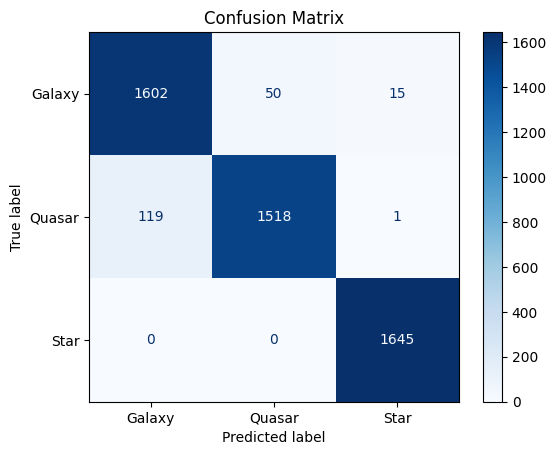

In [78]:
cm = confusion_matrix(y_test, grid_predictions_test)

# Plot the confusion matrix using ConfusionMatrixDisplay
classes = ['Galaxy', 'Quasar', 'Star']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

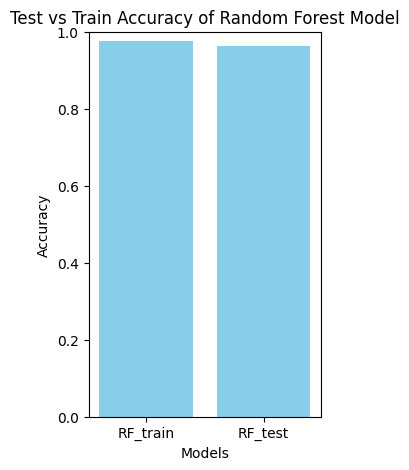

In [79]:
models = ['RF_train', 'RF_test']
accuracy = [accuracy_5, accuracy_test]

plt.figure(figsize=(3, 5))
plt.bar(models, accuracy, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Test vs Train Accuracy of Random Forest Model')
plt.ylim(0, 1)  
plt.show()


## Test and train accuracies are almost same, hence no overfitting

# <center> THANK YOU </center>